# Waymo Open Motion Data v1.2 Analysis

## Brief Introduction to Waymo Open Motion Dataset

Waymo Open Motion Dataset is collected by Waymo from six locations: San Francisco, Phoenix, Mountain View, Los Angeles, Detroit, and Seattle. This dataset has "103,354, 20s 10Hz segments (over 20 million frames)" in v1.2 version, equivalent to approximately 574 hours of rich driving scenarios. Each segment has its own 3D map data. 

Waymo has a plan to continue growing the dataset. From v1.0 to 1.2, the motion dataset has removed some object classes and enriched the details of the maps. 

This repository provides a data sample including less than 5% of the original v1.2 dataset. It also provides a visualized insight into the dataset. For those interested in accessing the complete dataset, please follow this [link](https://waymo.com/open/download/).

### Trajectory Types in Waymo Open Motion Dataset v1.2

In v1.2, there are only three categories of trajectories:

- `vehicle`
- `bicycle`
- `pedestrian`

In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import sys

sys.path.append(".")

import warnings

warnings.filterwarnings("ignore")

from utils import waymo_motion

data_path = "../trajectory/waymo_open_dataset_v_1_2_0/uncompressed"
folders = [
    "training",
    "training_20s",
    "validation",
    "validation_interactive",
    "testing",
    "testing_interactive",
]
tfrecord_file_lists = []
tfrecord_file_path_lists = []
for folder in folders:
    tf_record_file_list = os.listdir(os.path.join(data_path, folder))
    print(f"Number of tfrecord files in {folder}: {len(tf_record_file_list)}")
    tfrecord_file_lists.append(os.listdir(os.path.join(data_path, folder)))
    tfrecord_file_path_lists.append(
        [os.path.join(data_path, folder, f) for f in tf_record_file_list]
    )

Number of tfrecord files in training: 1000
Number of tfrecord files in training_20s: 1000
Number of tfrecord files in validation: 150
Number of tfrecord files in validation_interactive: 150
Number of tfrecord files in testing: 150
Number of tfrecord files in testing_interactive: 150


## Data Analysis

### Trajectory Visualization

It appears that the trajectory data in the Waymo Open Dataset no longer includes location information. Consequently, analyzing trajectory and speed distribution within this dataset becomes impractical. Additionally, since maps are linked to specific scenario segments, generating a comprehensive map incorporating all data pieces becomes unfeasible. This limitation hinders the ability to create a holistic representation of the complete dataset.

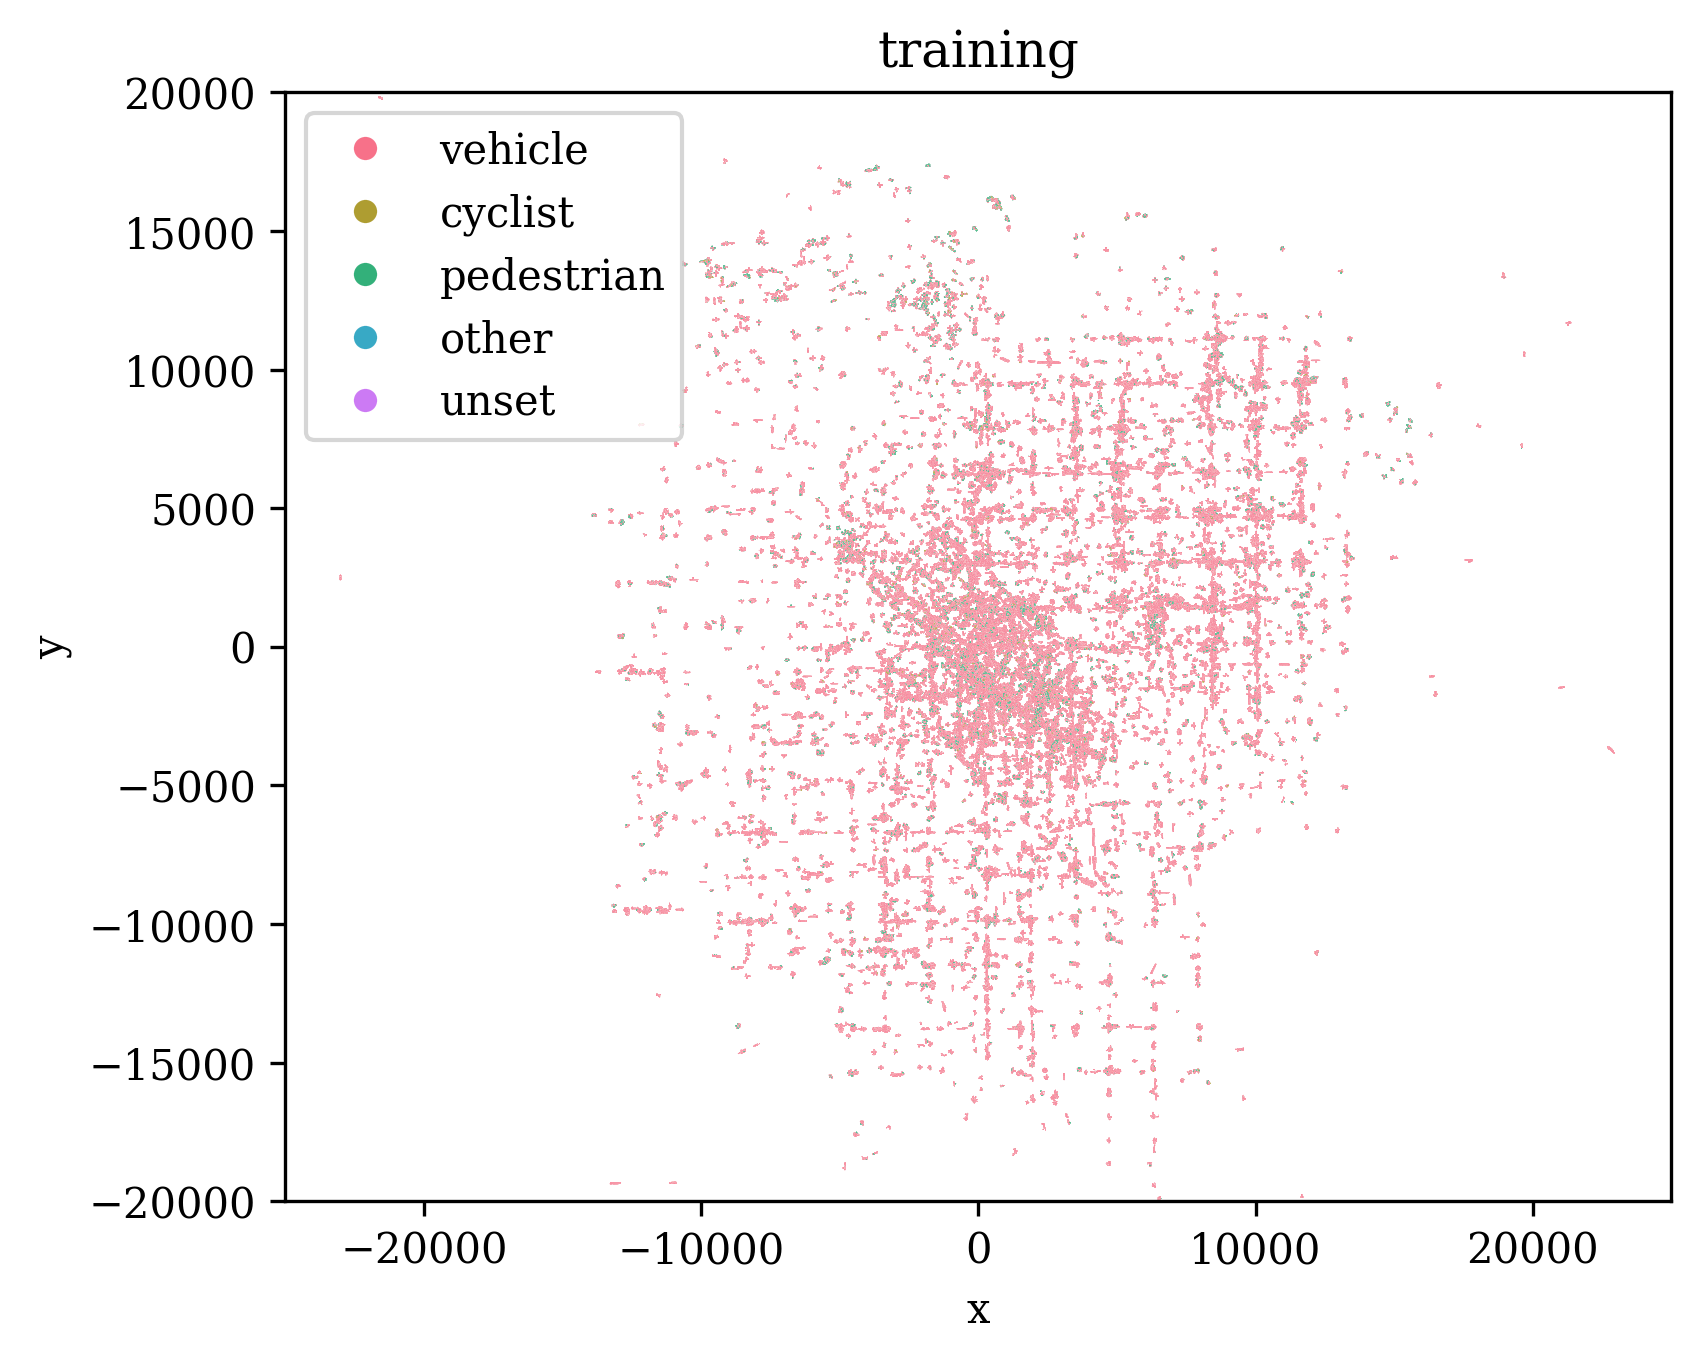

In [2]:
waymo_motion.plot_trajectory(folders[0], tfrecord_file_path_lists[0], proportion=0.03)

### Proportion of Trajectory Types

Examining the distribution of various trajectory types, it becomes evident that the scenarios in the Waymo Motion dataset are meticulously chosen. This dataset is specifically designed to capture representative downtown and suburban traffic scenarios in America.

                         vehicle  cyclist  pedestrian  other  unset
training                28681633   251128     3578070      0      0
training_20s             6049335    55004      843670      0      0
validation               2605216    21704      323786      0      0
validation_interactive   2571805    20427      318045      0      0
testing                  2645931    22257      322243      0      0
testing_interactive      2604203    20917      312448      0      0


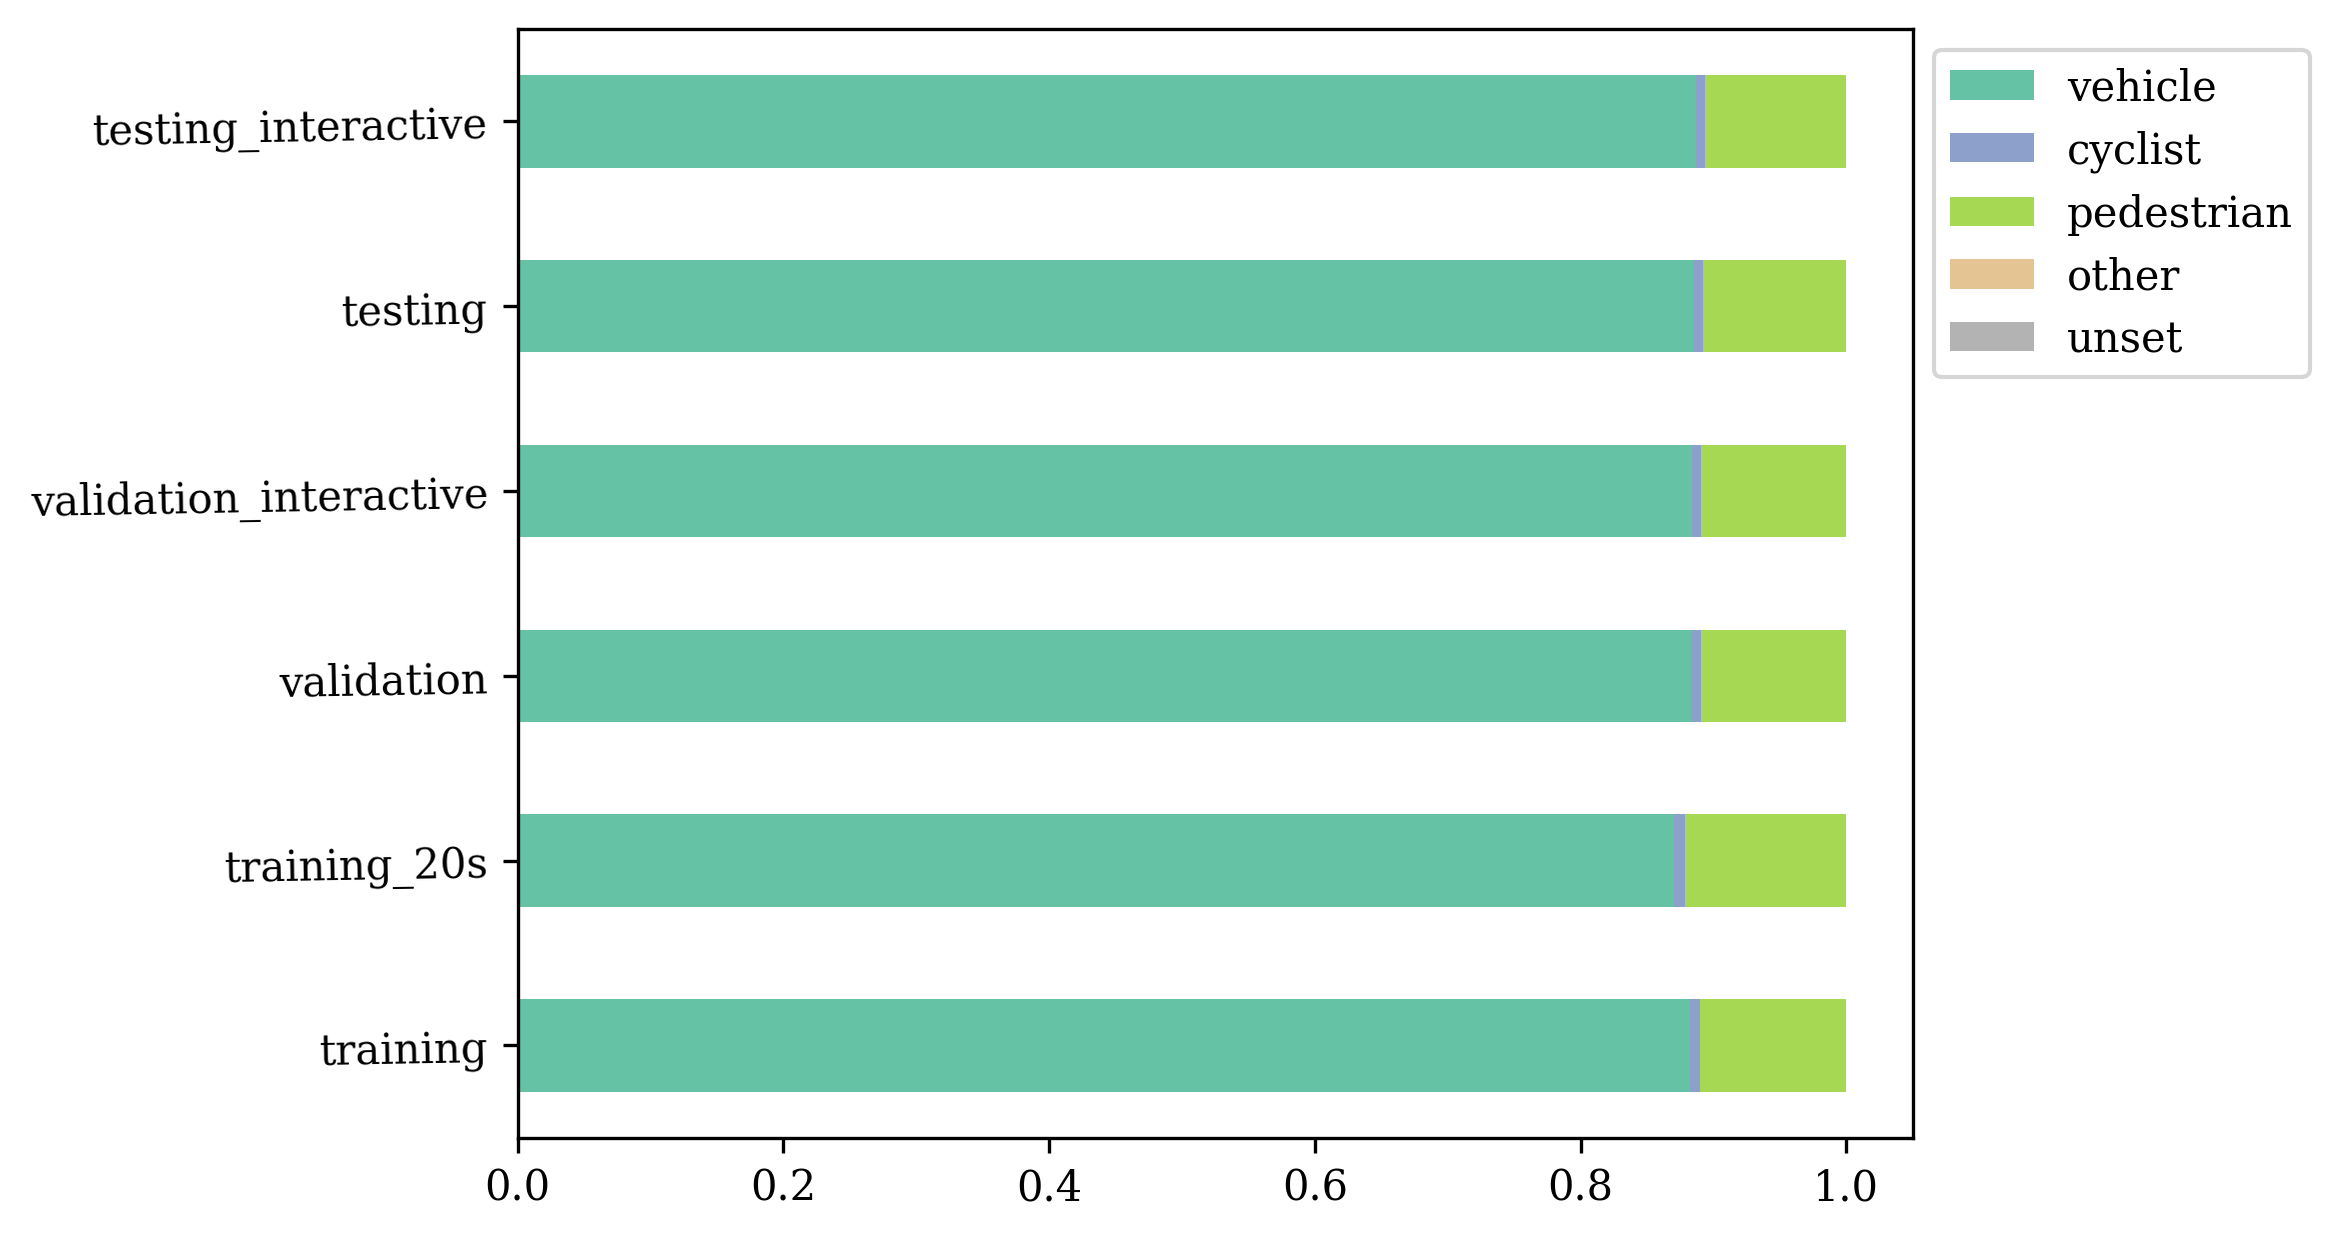

In [2]:
waymo_motion.plot_class_proportion(folders, tfrecord_file_path_lists)

### Mean Speed Distribution

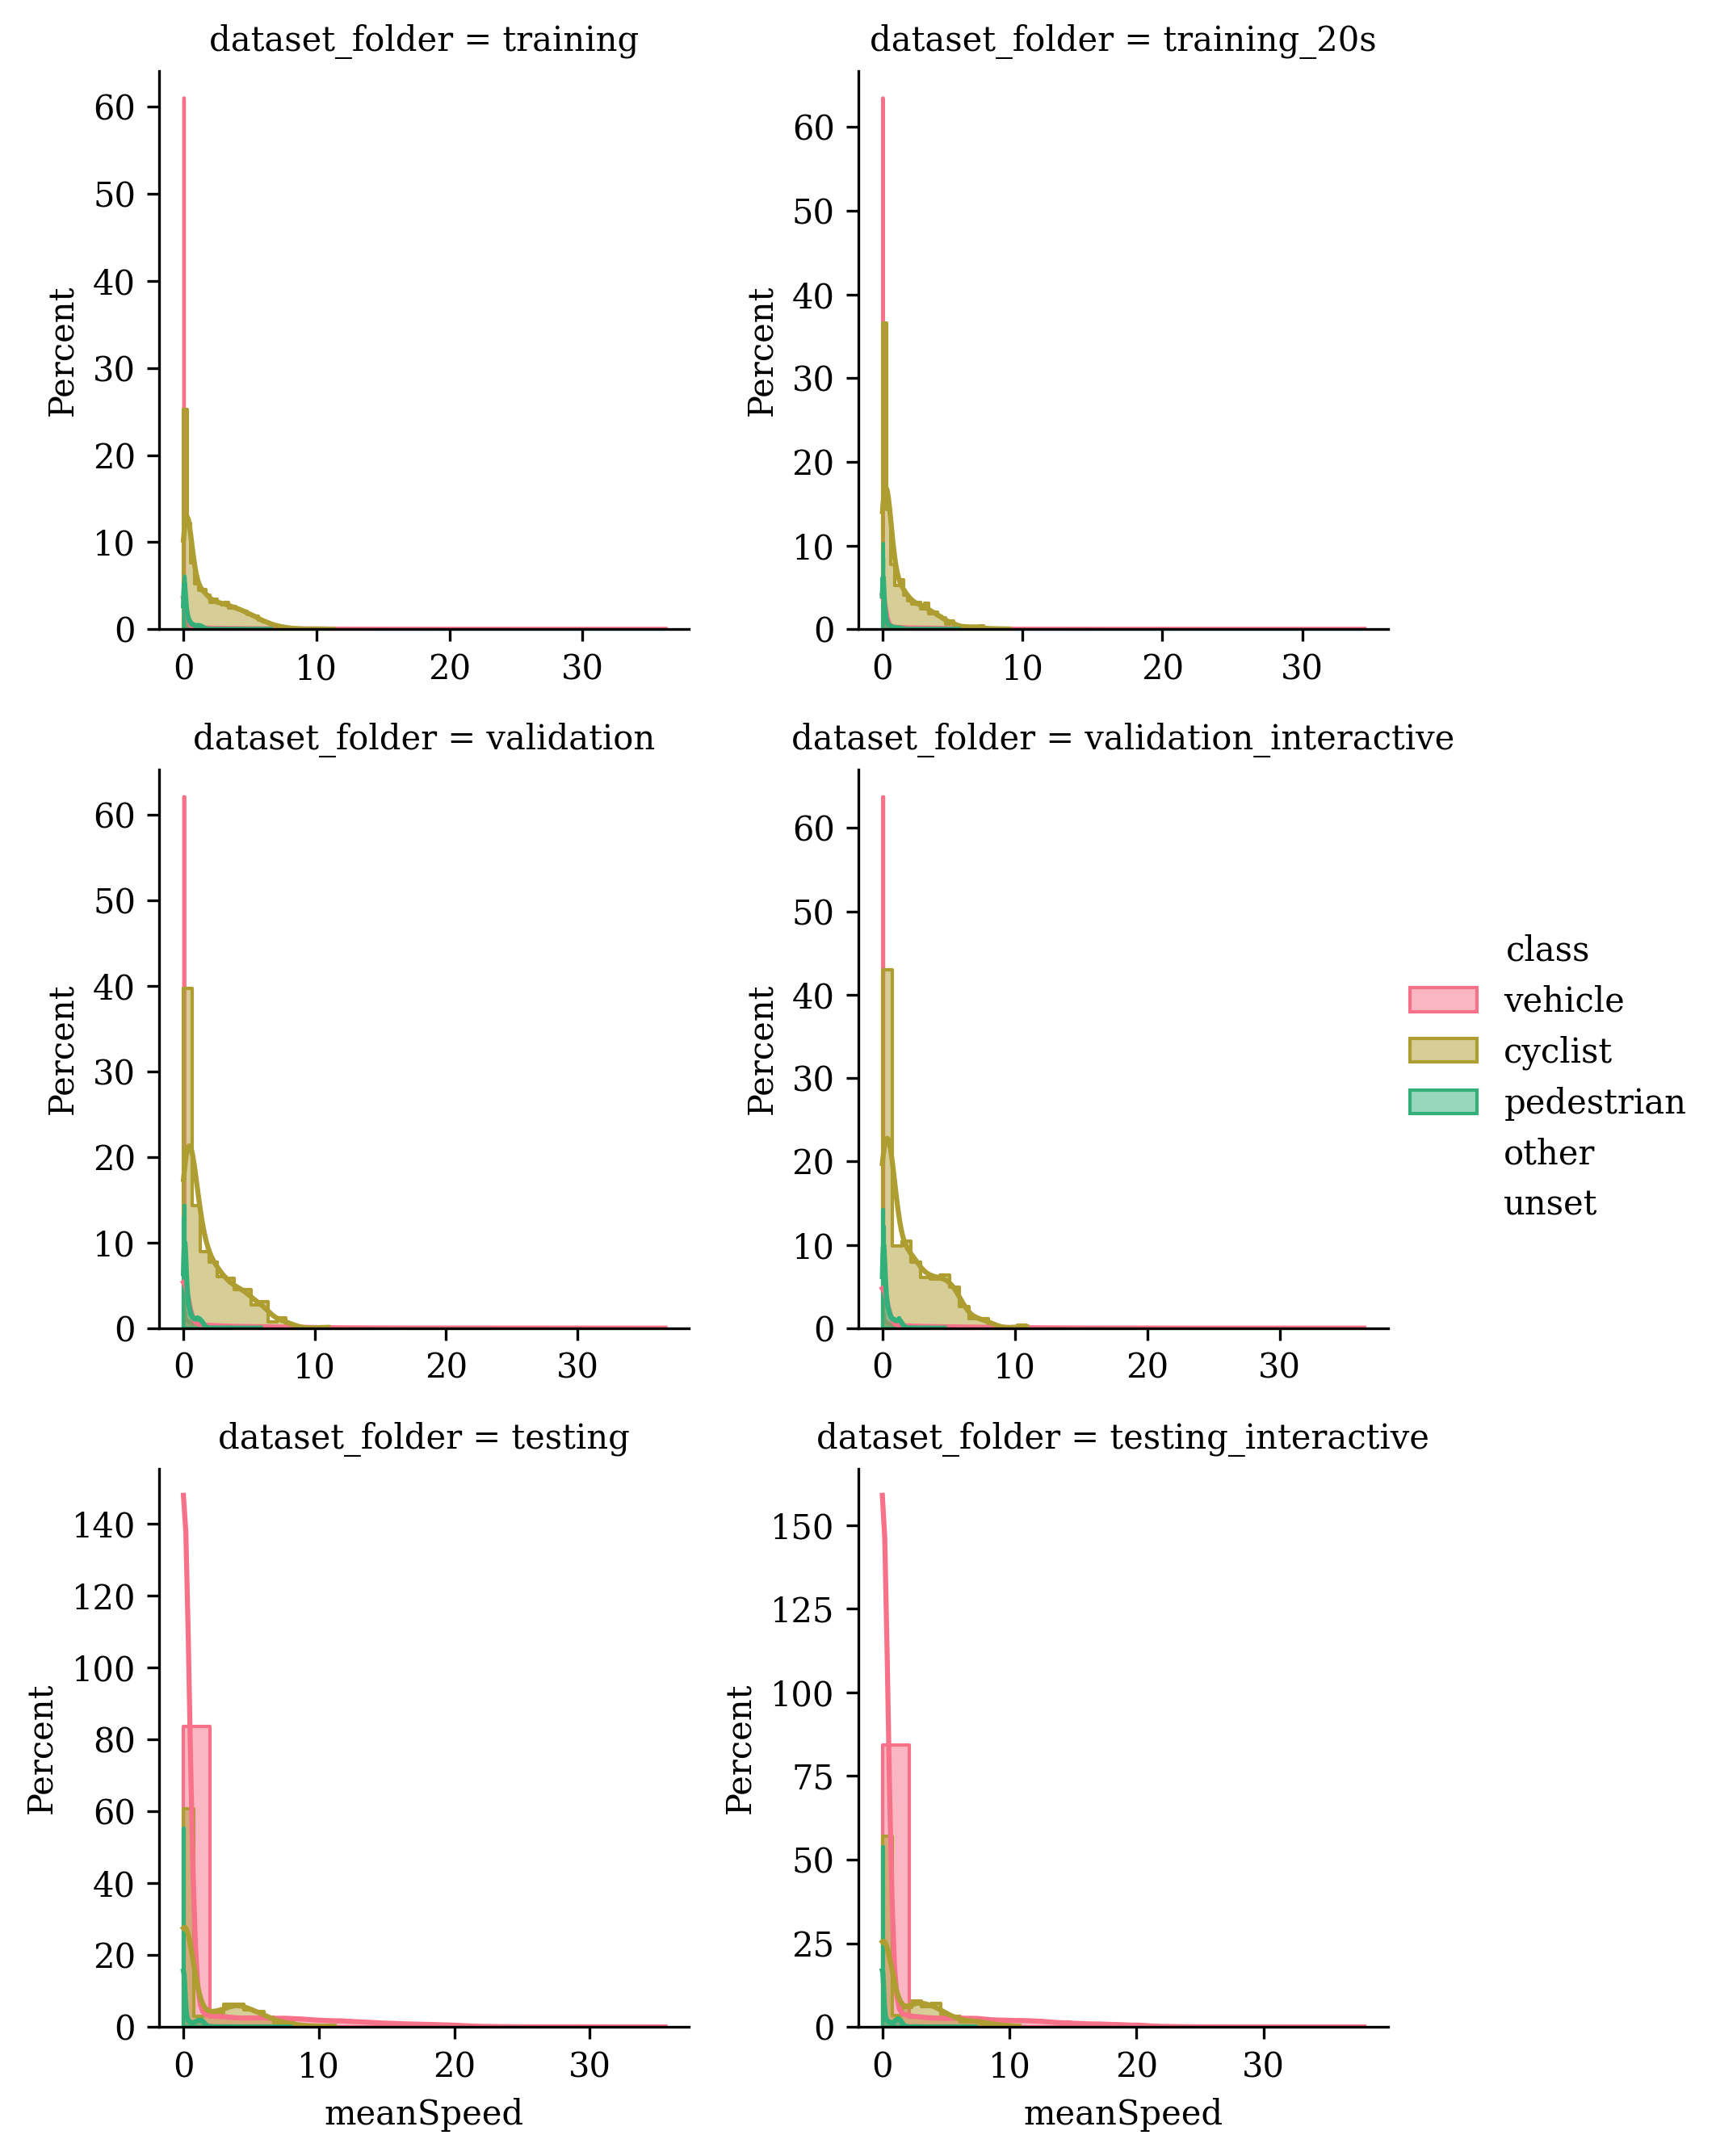

In [3]:
waymo_motion.plot_mean_speed_distribution(folders, tfrecord_file_path_lists, proportion=0.03)

### Angle Distribution

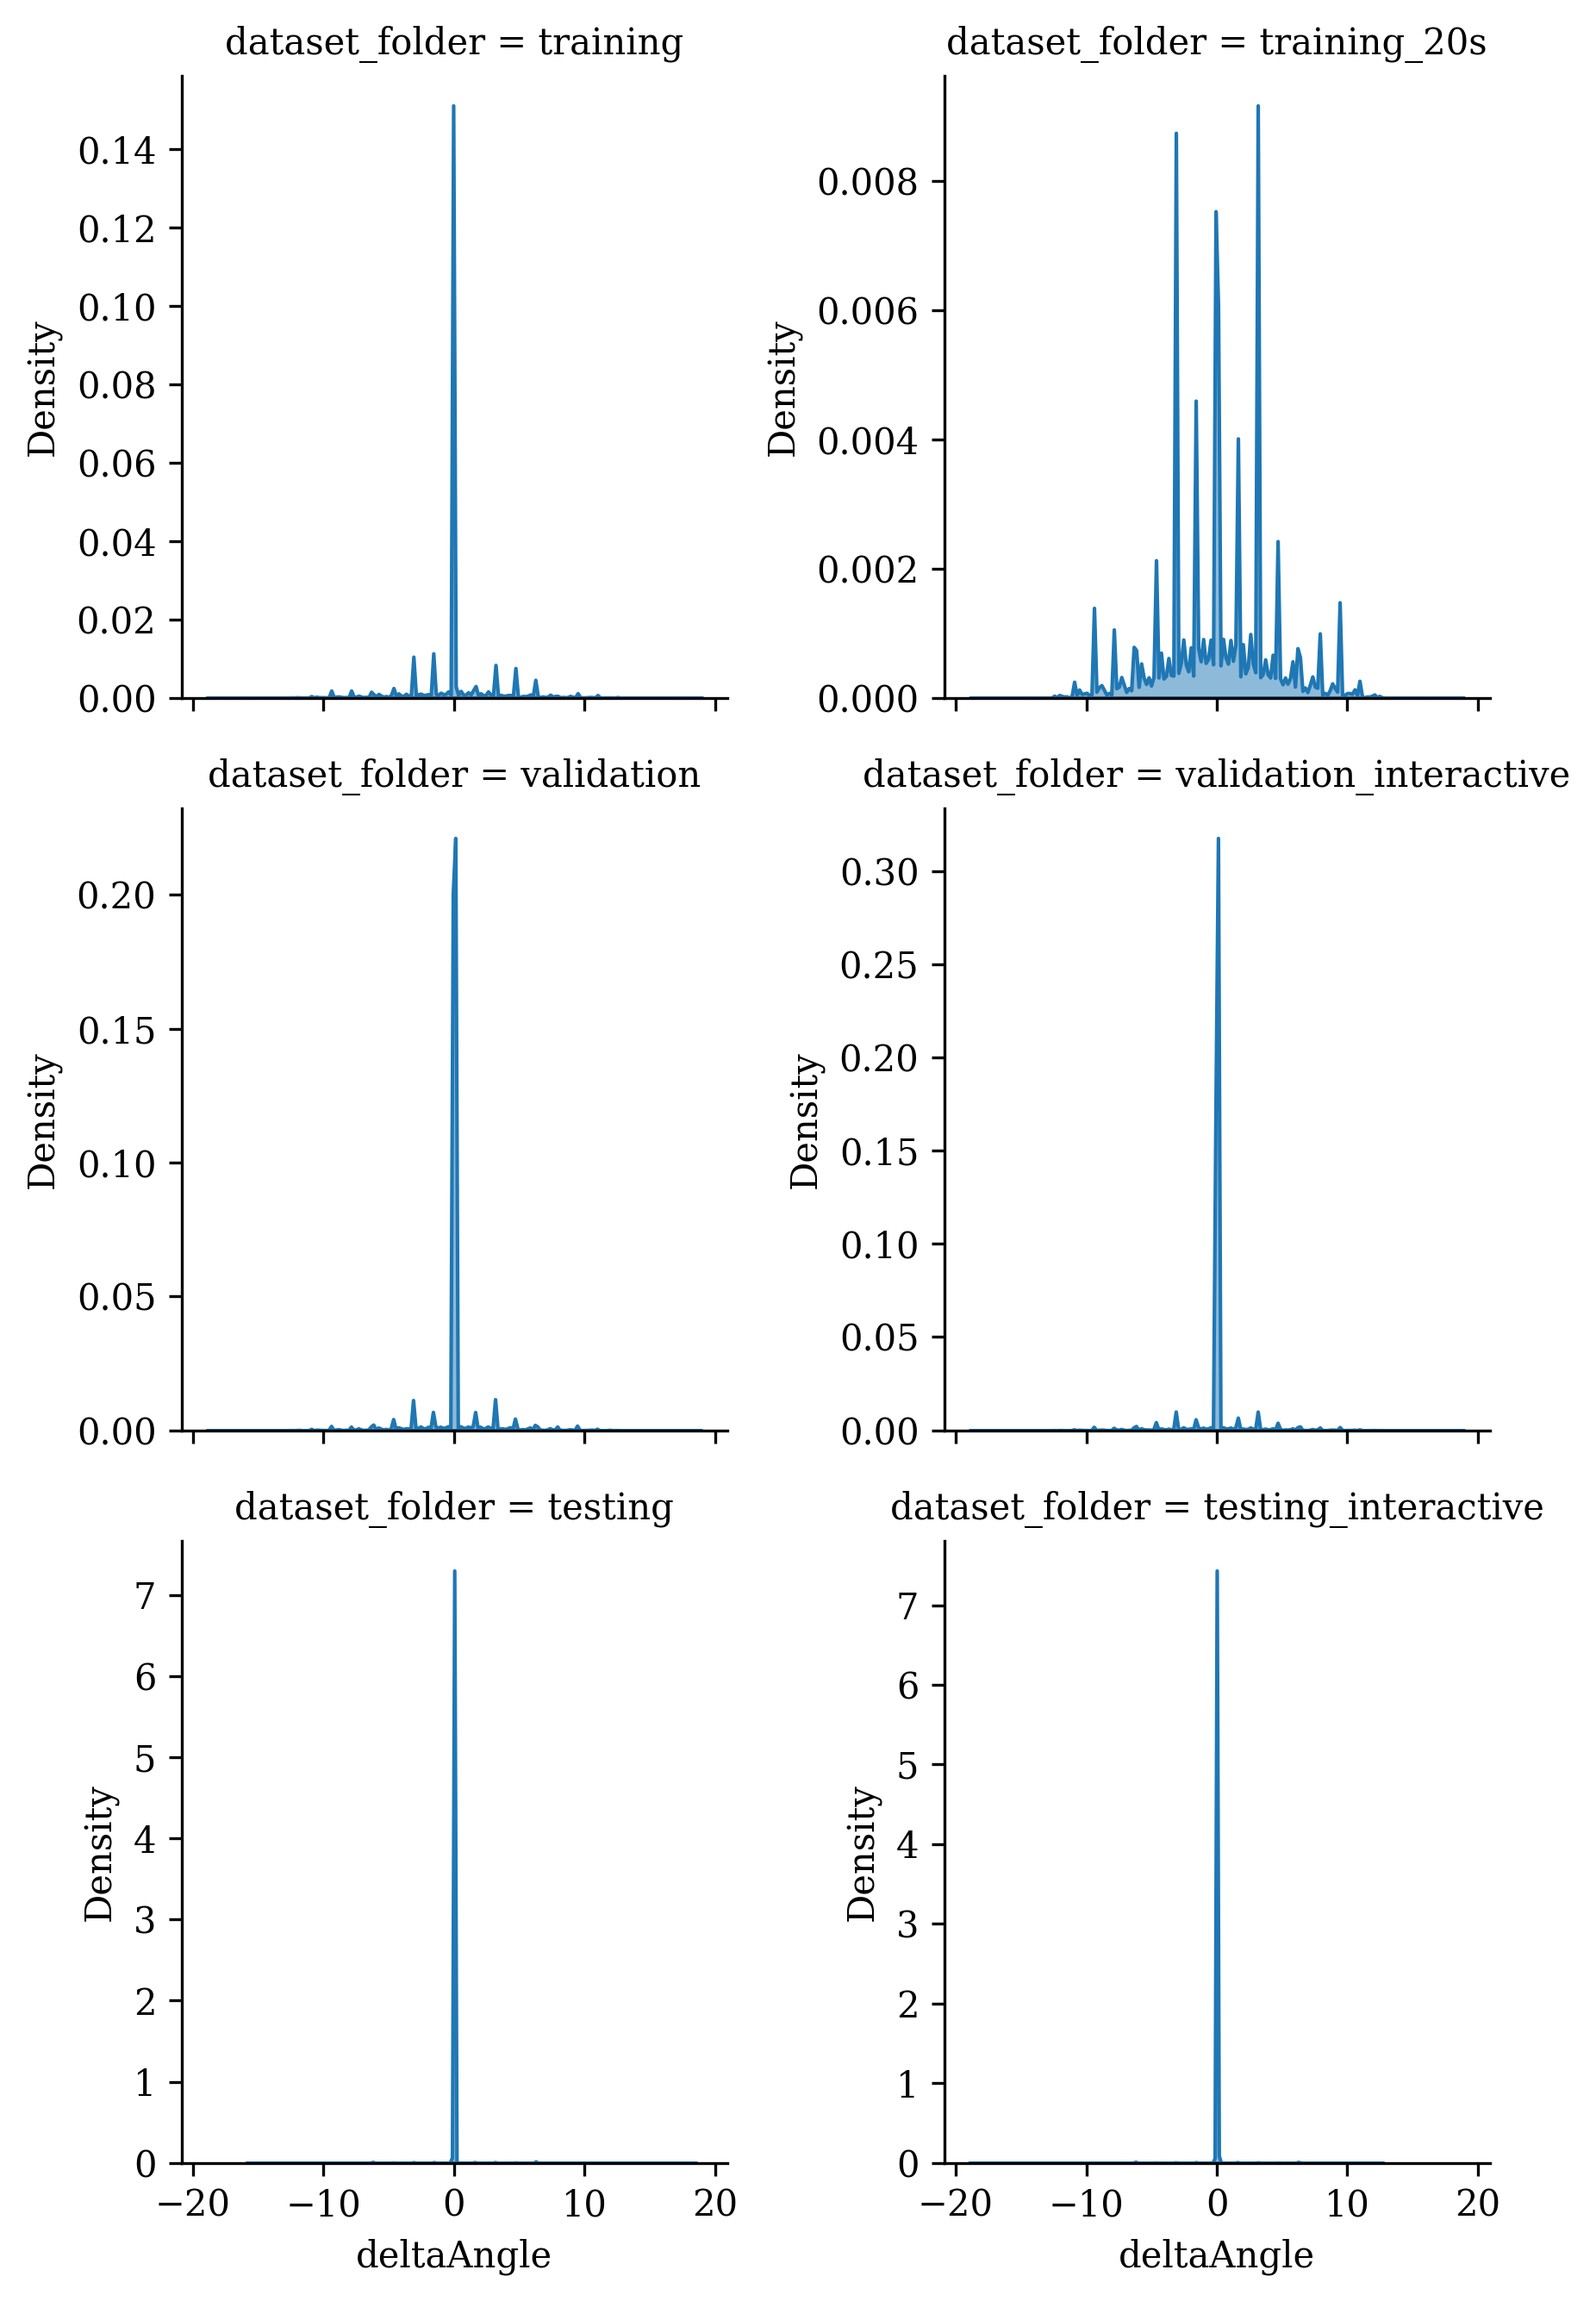

In [4]:
waymo_motion.plot_delta_angle_distribution(folders, tfrecord_file_path_lists, proportion=0.03)